In [17]:
import pandas as pd 

filepath_dict = {
    "yelp":"D:\\MachineLearningCourse\\Datasets\\sentiment labelled sentences\\yelp_labelled.txt",
    "amazon":"D:\\MachineLearningCourse\\Datasets\\sentiment labelled sentences\\amazon_cells_labelled.txt",
    "imdb":"D:\\MachineLearningCourse\\Datasets\\sentiment labelled sentences\\imdb_labelled.txt",
}

df_list = []

for source,filepath in filepath_dict.items():
    df = pd.read_csv(filepath,names=["sentence","label"],sep="\t")
    df["source"] = source
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [18]:
from sklearn.model_selection import train_test_split

df_yelp = df[df["source"]=="yelp"]

sentences = df_yelp["sentence"].values
y = df_yelp["label"].values

sentences_train,sentences_test,y_train,y_test = train_test_split(sentences,y,test_size=.25,random_state=1000)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression()
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
f1_score = f1_score(y_test,clf.predict(X_test))
print("Accuracy :",score)
print("F1 Score :",f1_score)

Accuracy : 0.796
F1 Score : 0.7951807228915662


In [5]:
for source in df["source"].unique():
    df_source = df[df["source"]==source]
    sentences = df_source.sentence.values
    y = df_source.label.values
    
    sentences_train , sentences_test , y_train, y_test = train_test_split(sentences,y,test_size=.25,random_state=1000)
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test = vectorizer.transform(sentences_test)
    
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    
    print(f"{source } Accuracy: ",score )

yelp Accuracy:  0.796
amazon Accuracy:  0.796
imdb Accuracy:  0.7486631016042781


In [6]:
from keras.models import Sequential 
from keras import layers

input_dim = X_train.shape[1]

model = Sequential()
model.add(layers.Dense(10,input_dim=input_dim,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))




Using TensorFlow backend.


In [7]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),verbose=0,batch_size=10)

In [18]:
loss ,accuracy = model.evaluate(X_train,y_train)
print(f"Trainin loss {loss} accuracy : {accuracy}")
loss ,accuracy = model.evaluate(X_test,y_test)
print(f"Trainin loss {loss} accuracy : {accuracy}")

750/750 [==============================] - 0s 76us/step
Trainin loss 0.00026925331647119794 accuracy : 1.0
250/250 [==============================] - 0s 68us/step
Trainin loss 0.7315362286567688 accuracy : 0.7960000038146973


In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


Bad key "text.kerning_factor" on line 4 in
C:\Users\bagat\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


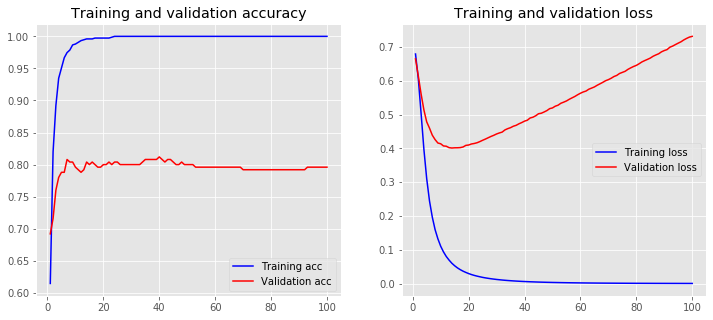

In [20]:
plot_history(history)

### WORD EMBEDDINGS

### One Hot Encoded

In [21]:
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']
cities

['London', 'Berlin', 'Berlin', 'New York', 'London']

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
city_labels = encoder.fit_transform(cities)
city_labels

array([1, 0, 0, 2, 1], dtype=int64)

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
city_labels = city_labels.reshape(5,1)
onehot = encoder.fit_transform(city_labels)
print(onehot.toarray())

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## Word embedding

In [24]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index)+1

print(sentences_train[2])
print(X_train[2])

Of all the dishes, the salmon was the best, but all were great.
[11, 43, 1, 171, 1, 283, 3, 1, 47, 26, 43, 24, 22]


In [25]:
for word in ["the","all","happy","sad"]:
    print(f"{word} : {tokenizer.word_index[word]} ")

the : 1 
all : 43 
happy : 320 
sad : 450 


In [26]:
from keras.preprocessing.sequence import pad_sequences 

maxlen = 100

X_train = pad_sequences(X_train,padding="post",maxlen=maxlen)
X_test = pad_sequences(X_test,padding="post",maxlen=maxlen)


## Embedding Layer
Keras önceden hesaplanmış değerleri alarak onlaro bir dense vektöre ekler. <br>
input_dim = Sözlük boyutu
output_dim = vektör boyutu
input_length = her bir sequence boyutu 

In [27]:
from keras.models import Sequential 
from keras import layers 

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           87350     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 137,371
Trainable params: 137,371
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train,y_train,epochs=20,verbose=False,validation_data=(X_test,y_test),batch_size=10)
loss,accuracy = model.evaluate(X_train,y_train)
print(f"Train Accuracy : {accuracy} loss: {loss}")
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Train Accuracy : {accuracy} loss: {loss}")



750/750 [==============================] - 0s 81us/step
Train Accuracy : 1.0 loss: 0.0015659359640752275
250/250 [==============================] - 0s 88us/step
Train Accuracy : 0.7799999713897705 loss: 0.644684582233429


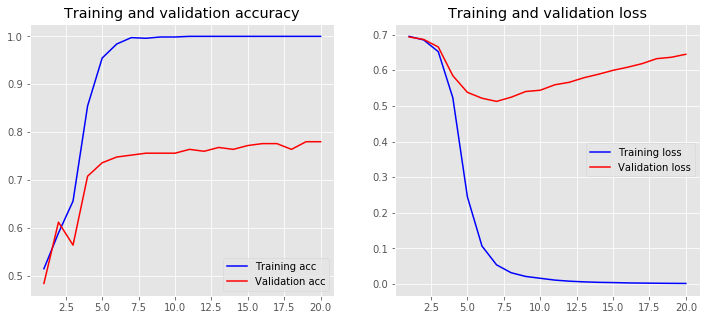

In [30]:
plot_history(history)

In [68]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [69]:
param_grid = dict(
    num_filter = [32,64,128],
    kernel_size = [3,5,7],
    vocab_size = [5000],
    embedding_dim = [50],
    maxlen = [100]
)

In [70]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

epochs = 20
embedding_dim = 50
maxlen = 100
output_file = "output.txt"

for source,fname in df.groupby("source"):
    print("running grid search ",source)
    sentences = df["sentence"].values
    y = df["label"].values
    
    sentences_train,sentences_test,y_train,y_test = train_test_split(sentences,y,test_size=.25,random_state=1000)
    
    tokenizer = Tokenizer(num_words = 5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)
    
    vocab_size = len(tokenizer.word_index)+1
    
    X_train = pad_sequences(X_train,padding="post",maxlen=maxlen)
    X_test = pad_sequences(X_test,padding="post",maxlen=maxlen)
    
    param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen])
    
    model = KerasClassifier(build_fn=create_model,epochs=epochs,batch_size=10,verbose=False)
    grid = RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv = 4,verbose=1,n_iter=5)
    
    grid_result = grid.fit(X_train,y_train)
    
    test_accuracy = grid.score(X_test,y_test)
    
    prompt = input(f"finished {source}, write to file and proceed y/n")
    if prompt.lower() not in {"y","true","yes"}:
        break
    
    with open(output_file,"a") as f:
        s = (f"Running {source} dataset \nBest Accuracy : {grid_result.best_score_} \n{grid_result.best_score_} \n{test_accuracy}")
    

running grid search  amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
df